# Redes Neurais: Problemas de Regressão

Autor:
- Larissa Ionafa RA:1903166
- Roberta Yumi Romero Takahashi RA:1903220

# Atividade

A base '05_df_treino_teste.csv' envolve características de imóveis e o preço de venda desses respectivos imóveis. Nessa base contém um conjunto variáveis explicativas. **Algumas dessas variáveis** são geradas após a venda do imóvel. Por esse motivo, na base '05_validacao.csv', constam menos colunas.

Da atividade:
1. Tratamento de dados: tratamento de missing, conversão de variável categórica para numérica e criação de novas variáveis;
2. Teste diferentes arquiteturas de redes neurais, utilizando a base '05_df_treino_teste.csv'. Não esqueça de dividir entre treino e teste.
3. Faça a predição na base '05_validacao.csv'. Cada grupo poderá enviar até 3 colunas de predição. É obrigatório enviar a coluna PRT_ID e as três colunas de predição.

Lembrem-se que a coluna **PRT_ID** não é uma variável explicativa.

## Lendo as bibliotecas

In [1]:
import tensorflow as tf
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', 25)

In [3]:
# Define a semente
seed_value = 2023
tf.random.set_seed(seed_value)
np.random.seed(seed_value)

## Base de Dados Chennai_House_Price_Prediction

* Fonte: https://www.kaggle.com/code/prabhulpradeepkumar/chennai-house-price-prediction

Há tanto o banco de dados quanto um dicionário de dados.

In [4]:
df_treino = pd.read_csv('./05_df_treino_teste.csv')
df_treino.tail()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
4995,P07626,KK Nagar,1733,17-09-2008,148,2.0,1.0,4,AbNormal,No,21-09-1993,Commercial,NoSeWa,Gravel,RL,2.9,4.5,4.9,4.180,709109,132958,14773100
4996,P04588,Karapakkam,1459,04-08-2010,35,2.0,2.0,4,Partial,Yes,06-08-2002,House,AllPub,Gravel,RH,2.0,3.0,4.4,3.260,333648,207403,9017500
4997,P00161,Anna Nagar,1854,02-11-2014,120,2.0,1.0,5,Normal Sale,Yes,07-11-1993,Others,ELO,No Access,RL,2.3,3.3,2.8,2.750,404223,236959,13938740
4998,P08529,Anna Nagar,1617,20-11-2007,58,1.0,1.0,4,AdjLand,Yes,21-11-2001,House,ELO,Gravel,RM,3.9,4.4,3.0,3.665,367007,211735,14115670
4999,P05833,Karapakkam,725,13-12-2009,147,1.0,1.0,2,AdjLand,Yes,21-12-1976,House,ELO,Paved,C,2.0,3.7,2.4,2.670,178317,49533,4953250


In [5]:
df_validacao = pd.read_csv('./05_validacao.csv', sep=';')
df_validacao.tail()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL
2104,P09034,Anna Nagar,1838,31,2.0,1.0,5,AdjLand,Yes,16/05/1971,Commercial,ELO,No Access,RH,2.7,3.7,3.2,3.15
2105,P02617,Chrompet,1191,189,1.0,1.0,3,Partial,Yes,07/09/1988,House,ELO,Gravel,RL,4.1,2.9,3.7,3.50
2106,P03449,KK Nagar,2317,37,4.0,2.0,6,AbNormal,No,31/03/1983,House,NoSewr,Paved,RH,5.0,4.6,2.2,3.76
2107,P06766,KK Nagar,2344,181,4.0,2.0,6,Normal Sale,No,04/06/1992,Commercial,NoSeWa,Gravel,RM,3.8,2.4,4.6,3.70
2108,P05763,Karapakkam,1008,194,1.0,1.0,3,Partial,Yes,03/01/1979,Commercial,NoSeWa,No Access,RL,2.5,4.5,3.4,3.46


## Tratamento de Dados

In [6]:
# Verificando valores faltantes no dataframe
missing_data_treino = df_treino.isnull().sum()
missing_data_validacao = df_validacao.isnull().sum()

# Filtrando apenas colunas que têm valores faltantes
missing_data_treino = missing_data_treino[missing_data_treino > 0]
missing_data_validacao = missing_data_validacao[missing_data_validacao > 0]

print(f"missing_data_treino: \n{missing_data_treino} \n\nmissing_data_validacao: \n{missing_data_validacao}")

missing_data_treino: 
N_BATHROOM     4
QS_OVERALL    29
dtype: int64 

missing_data_validacao: 
N_BEDROOM      1
N_BATHROOM     1
QS_OVERALL    19
dtype: int64


In [7]:
# Visualizando informações básicas sobre as colunas com valores faltantes
df_treino[['N_BATHROOM', 'QS_OVERALL']].describe()

,N_BATHROOM,QS_OVERALL
count,4996.000000,4971.000000
mean,1.215973,3.502875
std,0.411537,0.527007
min,1.000000,2.060000
25%,1.000000,3.120000
50%,1.000000,3.500000
75%,1.000000,3.890000
max,2.000000,4.970000


In [8]:
df_validacao[['N_BATHROOM', 'QS_OVERALL']].describe()

,N_BATHROOM,QS_OVERALL
count,2108.000000,2090.000000
mean,1.206831,3.504156
std,0.405129,0.527862
min,1.000000,2.000000
25%,1.000000,3.140000
50%,1.000000,3.500000
75%,1.000000,3.870000
max,2.000000,4.940000


In [9]:
# Preenchendo os valores faltantes

# Moda
df_treino['N_BATHROOM'].fillna(df_treino['N_BATHROOM'].mode()[0], inplace=True)
df_validacao['N_BATHROOM'].fillna(df_validacao['N_BATHROOM'].mode()[0], inplace=True)

# Mediana
df_treino['QS_OVERALL'].fillna(df_treino['QS_OVERALL'].median(), inplace=True)
df_validacao['QS_OVERALL'].fillna(df_validacao['QS_OVERALL'].median(), inplace=True)

# Verificando se ainda há valores faltantes

print(f"df_treino: \n{df_treino.isnull().sum().sum()} \n\ndf_validacao: \n{df_validacao.isnull().sum().sum()}")


df_treino: 
0 

df_validacao: 
1


In [10]:
# Identificando colunas categóricas
categorical_columns_treino = df_treino.select_dtypes(include=['object']).columns
categorical_columns_validacao = df_validacao.select_dtypes(include=['object']).columns

print(f"df_treino: \n{categorical_columns_treino} \n\ndf_validacao: \n{categorical_columns_validacao}")


df_treino: 
Index(['PRT_ID', 'AREA', 'DATE_SALE', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE'],
      dtype='object') 

df_validacao: 
Index(['PRT_ID', 'AREA', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD', 'BUILDTYPE',
       'UTILITY_AVAIL', 'STREET', 'MZZONE'],
      dtype='object')


In [11]:
df_treino.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [12]:
# AREA
area_mappings = {
    'Ann Nagar': 'Anna Nagar',
    'Ana Nagar' : 'Anna Nagar',
    'Velchery': 'Velachery',
    'Chrompt': 'Chrompet',
    'Chormpet': 'Chrompet',
    'Chrmpet': 'Chrompet',
    'Karapakam': 'Karapakkam',
    'KKNagar': 'KK Nagar',
    'TNagar': 'T Nagar',
    'Adyr': 'Adyar',
}
df_treino['AREA'] = df_treino['AREA'].replace(area_mappings)
df_validacao['AREA'] = df_validacao['AREA'].replace(area_mappings)

# SALE_COND
sale_cond_mappings = {
    'AdjLand': 'Adj Land',
    'Ab Normal': 'AbNormal',
    'Partiall' : 'Partial',
    'PartiaLl' : 'Partial'

}
df_treino['SALE_COND'] = df_treino['SALE_COND'].replace(sale_cond_mappings)
df_validacao['SALE_COND'] = df_validacao['SALE_COND'].replace(sale_cond_mappings)

# PARK_FACIL
park_facil_mappings = {
    'Noo': 'No'
}
df_treino['PARK_FACIL'] = df_treino['PARK_FACIL'].replace(park_facil_mappings)
df_validacao['PARK_FACIL'] = df_validacao['PARK_FACIL'].replace(park_facil_mappings)

# BUILDTYPE
buildtype_mappings = {
    'Comercial': 'Commercial',
    'Other': 'Others'
}
df_treino['BUILDTYPE'] = df_treino['BUILDTYPE'].replace(buildtype_mappings)
df_validacao['BUILDTYPE'] = df_validacao['BUILDTYPE'].replace(buildtype_mappings)

# UTILITY_AVAIL
utility_mappings = {
    'NoSewr ': 'NoSeWa',
    'All Pub': 'AllPub'
}
df_treino['UTILITY_AVAIL'] = df_treino['UTILITY_AVAIL'].replace(utility_mappings)
df_validacao['UTILITY_AVAIL'] = df_validacao['UTILITY_AVAIL'].replace(utility_mappings)

# STREET
street_mappings = {
    'Pavd': 'Paved',
    'NoAccess': 'No Access'
}
df_treino['STREET'] = df_treino['STREET'].replace(street_mappings)
df_validacao['STREET'] = df_validacao['STREET'].replace(street_mappings)

# Definir uma função para extrair a década
def extrair_decada(data):
    if pd.notnull(data):
        data_obj = pd.to_datetime(data, errors='coerce')
        return (data_obj.year // 10) * 10
    else:
        return None

# Aplicar a função para extrair a década
df_treino['DECADE_BUILD'] = df_treino['DATE_BUILD'].apply(extrair_decada)
df_validacao['DECADE_BUILD'] = df_validacao['DATE_BUILD'].apply(extrair_decada)


# Verificando novamente os valores únicos após as correções
unique_values_corrected = {}
for column in ['AREA', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'DECADE_BUILD']:
    unique_values_corrected[column] = df_treino[column].unique()
    unique_values_corrected[column] = df_validacao[column].unique()

unique_values_corrected



C:\Users\ionaf\AppData\Local\Temp\ipykernel_17604\1982441556.py:62: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data_obj = pd.to_datetime(data, errors='coerce')


C:\Users\ionaf\AppData\Local\Temp\ipykernel_17604\1982441556.py:62: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data_obj = pd.to_datetime(data, errors='coerce')


{'AREA': array(['KK Nagar', 'Karapakkam', 'Velachery', 'Chrompet', 'T Nagar',
        'Anna Nagar', 'Adyar'], dtype=object),
 'SALE_COND': array(['Adj Land', 'AbNormal', 'Partial', 'Family', 'Normal Sale'],
       dtype=object),
 'PARK_FACIL': array(['Yes', 'No'], dtype=object),
 'BUILDTYPE': array(['Others', 'House', 'Commercial'], dtype=object),
 'UTILITY_AVAIL': array(['NoSeWa', 'AllPub', 'ELO'], dtype=object),
 'STREET': array(['Paved', 'Gravel', 'No Access'], dtype=object),
 'DECADE_BUILD': array([1990, 1970, 1980, 1960, 2000, 1950, 2010], dtype=int64)}

In [13]:
df_validacao['SALE_COND'].value_counts()

Adj Land       433
Family         425
Partial        420
Normal Sale    416
AbNormal       415
Name: SALE_COND, dtype: int64

In [14]:
df_treino['SALE_COND'].value_counts()

Partial        1013
Normal Sale    1007
Adj Land       1006
AbNormal        996
Family          978
Name: SALE_COND, dtype: int64

In [15]:
# Aplicando codificação one-hot
df_encoded_treino = pd.get_dummies(df_treino, columns=['AREA', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE'], drop_first=True)
df_encoded_validacao = pd.get_dummies(df_validacao, columns=['AREA', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE'], drop_first=True)

# Verificando as primeiras linhas do dataframe após a codificação
df_encoded_treino.dtypes


PRT_ID                    object
INT_SQFT                   int64
DATE_SALE                 object
DIST_MAINROAD              int64
N_BEDROOM                float64
N_BATHROOM               float64
N_ROOM                     int64
DATE_BUILD                object
QS_ROOMS                 float64
QS_BATHROOM              float64
QS_BEDROOM               float64
QS_OVERALL               float64
REG_FEE                    int64
COMMIS                     int64
SALES_PRICE                int64
DECADE_BUILD               int64
AREA_Anna Nagar            uint8
AREA_Chrompet              uint8
AREA_KK Nagar              uint8
AREA_Karapakkam            uint8
AREA_T Nagar               uint8
AREA_Velachery             uint8
SALE_COND_Adj Land         uint8
SALE_COND_Family           uint8
SALE_COND_Normal Sale      uint8
SALE_COND_Partial          uint8
PARK_FACIL_Yes             uint8
BUILDTYPE_House            uint8
BUILDTYPE_Others           uint8
UTILITY_AVAIL_ELO          uint8
UTILITY_AV

### Dividindo a base entre treino, teste e validação

In [16]:
# Remover colunas 'PRT_ID' e 'DATE_SALE'
df_encoded_treino.drop(
    columns=['DATE_SALE', 'DATE_BUILD','COMMIS','REG_FEE'], inplace=True)
df_encoded_validacao.drop(columns=['DATE_BUILD'], inplace=True)

X = df_encoded_treino.drop(columns=['PRT_ID', 'SALES_PRICE'])
y = df_encoded_treino['SALES_PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ID = df_encoded_validacao['PRT_ID']
X_val = df_encoded_validacao.drop(columns=['PRT_ID'])

print(f" Treino {len(X_train)}, Teste {len(X_test)}, Validacao {len(X_val)}")
#Teremos uma amostra maior para treinar o modelo, uma menor para testar.
#Fora isso, temos uma parte dos dados que não fizeram parte da modelagem (dados "novos") para validar

 Treino 4000, Teste 1000, Validacao 2109


### Normalizando

In [17]:
for col in list(X_train.columns):
    maximo = X_train[col].max()
    minimo = X_train[col].min()

    X_train[col] = (X_train[col] - minimo) / (maximo - minimo)

#Novamente, uso os dados de X_train para replicar no treino e validação
    X_test[col] = (X_test[col] - minimo) / (maximo - minimo)

In [18]:
X_val = df_encoded_validacao.drop(columns=['PRT_ID'])
ID = df_encoded_validacao.PRT_ID

## Modelagem

### Parametros da Rede Neural

* Early Stopping

In [19]:
# Incluindo early stopping

# Defina o callback EarlyStopping
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='loss',  # Métrica a ser monitorada
    patience=50,          # Número de épocas sem melhoria antes de parar o treinamento
    restore_best_weights=True  # Restaura os melhores pesos encontrados durante o treinamento
)

* Learning Rate

In [20]:
# Definindo a função para agendar o learning rate
def lr_scheduler(epoch):
    if epoch < 50:
        return 0.005
    elif epoch < 100:
        return 0.001
    elif epoch < 150:
        return 0.0005
    else:
        return 0.0001

# Criando o callback para o Learning Rate Scheduler
lr_scheduler_callback = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)

# Optei por alterar o learning rate a cada 50 epocas,
# pois o early stop vai encerrar o treinamento quando 50 epocas se passarem sem melhorar o modelo.

Lembrete: esses parâmetros (early stopping e learning rate) são utilizados como callbacks:



```
# Treinando o modelo
model.fit(X_train, y_train, epochs=200, batch_size=16, callbacks=[lr_scheduler_callback,early_stopping_callback])
```



* Treinamento com Treino e Teste



```
# Treinando o modelo com os dados de treinamento e calculando a perda no conjunto de teste
history = model.fit(X_train, y_train, epochs=200, batch_size=16, validation_data=(X_test, y_test))

```



### Modelo 1

In [21]:
# Crie o modelo sequencial
model = tf.keras.models.Sequential() #Definimos que é um modelo de rede neural sequencial

# Adicione a primeira camada oculta
model.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],))) #Adicionamos a primeira camada que recebe os inputs e terá 2 neurônios

# Adicione a segunda camada oculta
model.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a terceira camada oculta
model.add(tf.keras.layers.Dense(512, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quarta camada oculta
model.add(tf.keras.layers.Dense(512, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model.add(tf.keras.layers.Dense(128, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model.add(tf.keras.layers.Dense(64, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a camada de saída
model.add(tf.keras.layers.Dense(1, activation='relu')) #O valor 1 é porque vamos retornar apenas 1 output nessa camada de saída.

# Compila o modelo
model.compile(optimizer='adam', loss=tf.keras.losses.Huber(delta=1.0))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               4224      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 512)               131584    
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 64)                8

In [23]:
history = model.fit(X_train.values, np.array(y_train), epochs=1000, batch_size=int(0.50*len(X)), verbose=1,
                    callbacks=[early_stopping_callback,lr_scheduler_callback],
                    validation_data=(X_test.values, np.array(y_test))
                    )

Epoch 1/1000


2/2 [==============================] - 2s 223ms/step - loss: 10906449.0000 - val_loss: 10902360.0000 - lr: 0.0050
Epoch 2/1000
2/2 [==============================] - 0s 56ms/step - loss: 10906329.0000 - val_loss: 10901512.0000 - lr: 0.0050
Epoch 3/1000
2/2 [==============================] - 0s 54ms/step - loss: 10904832.0000 - val_loss: 10894942.0000 - lr: 0.0050
Epoch 4/1000
2/2 [==============================] - 0s 52ms/step - loss: 10894855.0000 - val_loss: 10861609.0000 - lr: 0.0050
Epoch 5/1000
2/2 [==============================] - 0s 57ms/step - loss: 10848070.0000 - val_loss: 10730248.0000 - lr: 0.0050
Epoch 6/1000
2/2 [==============================] - 0s 52ms/step - loss: 10672598.0000 - val_loss: 10294000.0000 - lr: 0.0050
Epoch 7/1000
2/2 [==============================] - 0s 57ms/step - loss: 10109128.0000 - val_loss: 9013500.0000 - lr: 0.0050
Epoch 8/1000
2/2 [==============================] - 0s 58ms/step - loss: 8492295.0000 - val_loss: 5671089.5000 - lr: 0.0050
Epoch 9

In [24]:
# Acessando o histórico de treinamento para visualizar a perda no conjunto de treinamento e no conjunto de teste
train_loss = history.history['loss']
test_loss = history.history['val_loss']

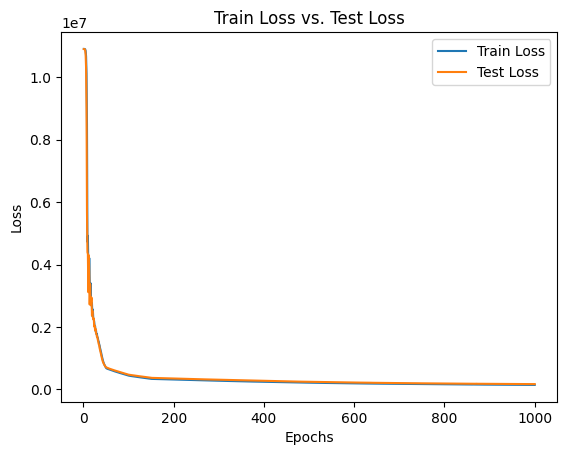

In [25]:
# Plotando o gráfico comparativo
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, label='Train Loss')
plt.plot(epochs, test_loss, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss vs. Test Loss')
plt.legend()
plt.show()

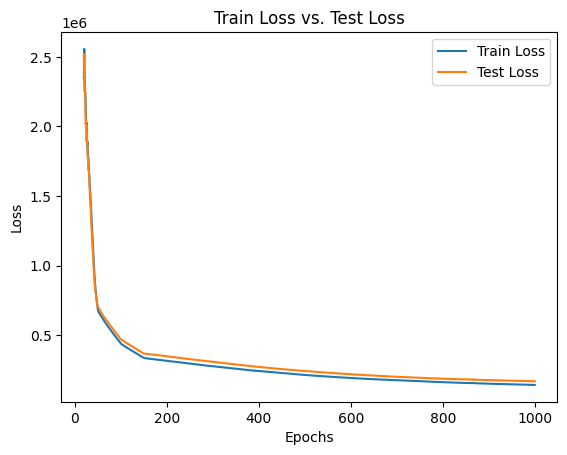

In [26]:
# Plotando o gráfico comparativo a partir da epoch 25
epochs = range(20, len(train_loss) + 1)
plt.plot(epochs, train_loss[19:], label='Train Loss')
plt.plot(epochs, test_loss[19:], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss vs. Test Loss')
plt.legend()
plt.show()

### Modelo 2

In [27]:
# Crie o model2o sequencial
model2 = tf.keras.models.Sequential() #Definimos que é um model2o de rede neural sequencial

# Adicione a primeira camada oculta
model2.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],))) #Adicionamos a primeira camada que recebe os inputs e terá 2 neurônios

# Adicione a segunda camada oculta
model2.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a terceira camada oculta
model2.add(tf.keras.layers.Dense(512, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quarta camada oculta
model2.add(tf.keras.layers.Dense(512, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model2.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model2.add(tf.keras.layers.Dense(128, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model2.add(tf.keras.layers.Dense(64, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a camada de saída
model2.add(tf.keras.layers.Dense(1, activation='relu')) #O valor 1 é porque vamos retornar apenas 1 output nessa camada de saída.

# Compila o model2o
model2.compile(optimizer='adam', loss='mean_squared_error')


In [28]:
history2 = model2.fit(X_train.values, np.array(y_train), epochs=1000, batch_size=int(0.50*len(X)), verbose=1,
                    callbacks=[early_stopping_callback,lr_scheduler_callback],
                    validation_data=(X_test.values, np.array(y_test)))

Epoch 1/1000
2/2 [==============================] - 1s 174ms/step - loss: 133507405840384.0000 - val_loss: 132806730579968.0000 - lr: 0.0050
Epoch 2/1000
2/2 [==============================] - 0s 58ms/step - loss: 133506155937792.0000 - val_loss: 132797419225088.0000 - lr: 0.0050
Epoch 3/1000
2/2 [==============================] - 0s 50ms/step - loss: 133489269669888.0000 - val_loss: 132718406926336.0000 - lr: 0.0050
Epoch 4/1000
2/2 [==============================] - 0s 54ms/step - loss: 133365948743680.0000 - val_loss: 132281771491328.0000 - lr: 0.0050
Epoch 5/1000
2/2 [==============================] - 0s 50ms/step - loss: 132737566507008.0000 - val_loss: 130448776757248.0000 - lr: 0.0050
Epoch 6/1000
2/2 [==============================] - 0s 56ms/step - loss: 130251191484416.0000 - val_loss: 124092510371840.0000 - lr: 0.0050
Epoch 7/1000
2/2 [==============================] - 0s 69ms/step - loss: 121993739370496.0000 - val_loss: 105447252033536.0000 - lr: 0.0050
Epoch 8/1000
2/2 [=

In [29]:
# Acessando o histórico de treinamento para visualizar a perda no conjunto de treinamento e no conjunto de teste
train_loss2 = history2.history['loss']
test_loss2 = history2.history['val_loss']

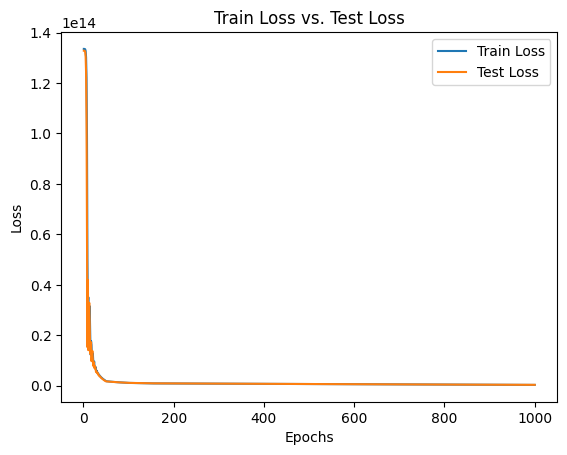

In [30]:
# Plotando o gráfico comparativo
epochs = range(1, len(train_loss2) + 1)
plt.plot(epochs, train_loss2, label='Train Loss')
plt.plot(epochs, test_loss2, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss vs. Test Loss')
plt.legend()
plt.show()

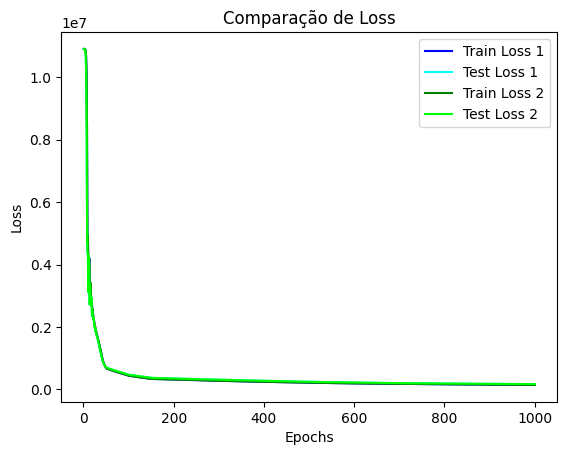

In [31]:
# Interpolação para ajustar as curvas de perda com a mesma quantidade de pontos
epochs1 = range(1, len(train_loss) + 1)
epochs2 = np.linspace(1, len(train_loss), len(train_loss2))
train_loss2_interp = np.interp(epochs2, epochs1, train_loss)
test_loss2_interp = np.interp(epochs2, epochs1, test_loss)

# Plotando o gráfico comparativo
plt.plot(epochs1, train_loss, label='Train Loss 1', color='blue')
plt.plot(epochs1, test_loss, label='Test Loss 1', color='cyan')
plt.plot(epochs2, train_loss2_interp, label='Train Loss 2', color='green')
plt.plot(epochs2, test_loss2_interp, label='Test Loss 2', color='lime')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Comparação de Loss')
plt.legend()
plt.show()

Neste exemplo, comparamos a mesma arquitetura de rede neural, alterando apenas a função de perda.

No modelo 1, a função de perda era Huber Loss. No modelo 2, RMSE.

Vale ressaltar, que os resultados dos modelos dependem da inicialização. Portanto, isso pode variar, dependendo da execução.

**Percebemos que, o modelo 1 apresentou um erro melhor.**

### Modelo 3

In [32]:
# Crie o model3o sequencial
model3 = tf.keras.models.Sequential() #Definimos que é um model3o de rede neural sequencial

# Adicione a primeira camada oculta
model3.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],))) #Adicionamos a primeira camada que recebe os inputs e terá 2 neurônios

# Adicione a quinta camada oculta
model3.add(tf.keras.layers.Dense(64, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model3.add(tf.keras.layers.Dense(32, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a camada de saída
model3.add(tf.keras.layers.Dense(16, activation='relu')) #O valor 1 é porque vamos retornar apenas 1 output nessa camada de saída.
# Adicione a camada de saída
model3.add(tf.keras.layers.Dense(16, activation='relu')) #O valor 1 é porque vamos retornar apenas 1 output nessa camada de saída.
# Adicione a camada de saída
model3.add(tf.keras.layers.Dense(1, activation='relu')) #O valor 1 é porque vamos retornar apenas 1 output nessa camada de saída.

# Compila o modelo3
model3.compile(optimizer='adam', loss='mean_squared_error')


In [33]:
history3 = model3.fit(X_train.values, np.array(y_train), epochs=1000, batch_size=int(0.50*len(X)), verbose=1,
                    callbacks=[early_stopping_callback,lr_scheduler_callback],
                    validation_data=(X_test.values, np.array(y_test)))

Epoch 1/1000


2/2 [==============================] - 1s 163ms/step - loss: 133507422617600.0000 - val_loss: 132807225507840.0000 - lr: 0.0050
Epoch 2/1000
2/2 [==============================] - 0s 29ms/step - loss: 133507405840384.0000 - val_loss: 132807208730624.0000 - lr: 0.0050
Epoch 3/1000
2/2 [==============================] - 0s 29ms/step - loss: 133507380674560.0000 - val_loss: 132807166787584.0000 - lr: 0.0050
Epoch 4/1000
2/2 [==============================] - 0s 28ms/step - loss: 133507338731520.0000 - val_loss: 132807091290112.0000 - lr: 0.0050
Epoch 5/1000
2/2 [==============================] - 0s 32ms/step - loss: 133507254845440.0000 - val_loss: 132806940295168.0000 - lr: 0.0050
Epoch 6/1000
2/2 [==============================] - 0s 31ms/step - loss: 133507095461888.0000 - val_loss: 132806680248320.0000 - lr: 0.0050
Epoch 7/1000
2/2 [==============================] - 0s 29ms/step - loss: 133506793472000.0000 - val_loss: 132806210486272.0000 - lr: 0.0050
Epoch 8/1000
2/2 [==============

In [35]:
# Acessando o histórico de treinamento para visualizar a perda no conjunto de treinamento e no conjunto de teste
train_loss3 = history3.history['loss']
test_loss3 = history3.history['val_loss']

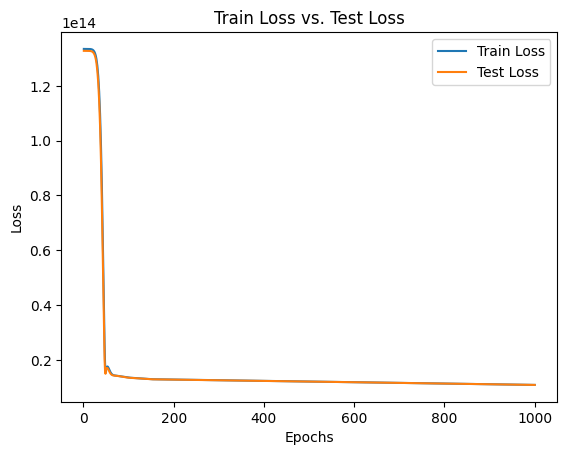

In [36]:
# Plotando o gráfico comparativo
epochs = range(1, len(train_loss3) + 1)
plt.plot(epochs, train_loss3, label='Train Loss')
plt.plot(epochs, test_loss3, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss vs. Test Loss')
plt.legend()
plt.show()

### Teste Random Forest

In [37]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
# Criar e treinar o modelo de Random Forest
model_rf = RandomForestRegressor(min_samples_leaf=int(len(X_train)*0.05),random_state=2023,n_estimators=250)
# n_estimators = Qt de arvores;
# min_samples_leaf = qt de dados necessario em cada folha
# random_state = semente

In [39]:
model_rf.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=200, n_estimators=250, random_state=2023)

### Gerando o CSV

In [40]:
len(X_val.columns)

32

In [41]:
len(X_test.columns)

32

In [42]:
len(X_train.columns)

32

In [43]:
colunas_diferentes = X_test.columns.difference(X_val.columns)

colunas_diferentes

Index([], dtype='object')

In [44]:
X_test.head()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,DECADE_BUILD,AREA_Anna Nagar,AREA_Chrompet,...,PARK_FACIL_Yes,BUILDTYPE_House,BUILDTYPE_Others,UTILITY_AVAIL_ELO,UTILITY_AVAIL_NoSeWa,STREET_No Access,STREET_Paved,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
1501,0.268268,0.160,0.000000,0.0,0.25,0.466667,0.800000,0.400000,0.536082,0.714286,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2586,0.416917,0.390,0.333333,0.0,0.50,0.733333,0.366667,0.366667,0.470790,0.714286,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2653,0.544545,0.400,0.333333,0.0,0.50,0.733333,0.966667,0.033333,0.628866,0.285714,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1055,0.533534,0.425,0.000000,0.0,0.50,0.733333,0.866667,0.666667,0.738832,0.571429,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
705,0.319319,0.115,0.000000,0.0,0.25,0.200000,0.733333,0.000000,0.343643,0.714286,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [45]:
df_treino['AREA'].value_counts()

Chrompet      1192
Karapakkam     950
KK Nagar       707
Velachery      671
Adyar          575
Anna Nagar     555
T Nagar        350
Name: AREA, dtype: int64

In [46]:
#Criando o DataFrame que Irá Armazenar os Resultados
result = pd.DataFrame(index=ID)

In [47]:
X_val.dtypes

INT_SQFT                   int64
DIST_MAINROAD              int64
N_BEDROOM                float64
N_BATHROOM               float64
N_ROOM                     int64
QS_ROOMS                 float64
QS_BATHROOM              float64
QS_BEDROOM               float64
QS_OVERALL               float64
DECADE_BUILD               int64
AREA_Anna Nagar            uint8
AREA_Chrompet              uint8
AREA_KK Nagar              uint8
AREA_Karapakkam            uint8
AREA_T Nagar               uint8
AREA_Velachery             uint8
SALE_COND_Adj Land         uint8
SALE_COND_Family           uint8
SALE_COND_Normal Sale      uint8
SALE_COND_Partial          uint8
PARK_FACIL_Yes             uint8
BUILDTYPE_House            uint8
BUILDTYPE_Others           uint8
UTILITY_AVAIL_ELO          uint8
UTILITY_AVAIL_NoSeWa       uint8
STREET_No Access           uint8
STREET_Paved               uint8
MZZONE_C                   uint8
MZZONE_I                   uint8
MZZONE_RH                  uint8
MZZONE_RL 

In [48]:
y_pred = model.predict(np.array(X_val)).flatten()

result['Model_1'] = y_pred


66/66 [==============================] - 0s 1ms/step


In [49]:
y_pred = model2.predict(np.array(X_val)).flatten()

result['Model_2'] = y_pred

66/66 [==============================] - 0s 2ms/step


In [50]:
y_pred = model3.predict(np.array(X_val)).flatten()

result['Model_3'] = y_pred

66/66 [==============================] - 0s 703us/step


In [51]:
result_export = result[['Model_1', 'Model_2', 'Model_3']]

result_export.to_csv('Result/LARISSA_IONAFA_ROBERTA_YUMI.csv')